In [1]:
from ultralytics import YOLO

# Load your trained model
model = YOLO('/Users/benmartin/dev/best_bgr29.pt')


In [83]:
results = model.track(source="/Users/benmartin/dev/results/240hz/vids/54.mp4")






WARNING ⚠️ inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

video 1/1 (1/260) /Users/benmartin/dev/results/240hz/vids/54.mp4: 1088x1920 2 0s, 1616.9ms
video 1/1 (2/260) /Users/benmartin/dev/results/240hz/vids/54.mp4: 1088x1920 9 0s, 1608.1ms
video 1/1 (3/260) /Users/benmartin/dev/results/240hz/vids/54.mp4: 1088x1920 9 0s, 1612.4ms
video 1/1 (4/260) /Users/benmartin/dev/results/240hz/vids/54.mp4: 1088x1920 9 0s, 1604.4ms
video 1/1 (5/260) /Users/benmartin/dev/results/240hz/vids/54.mp4: 1088x1920 10 0s, 1608.2ms


In [112]:
# Placeholder for the formatted tracks
results = model.track(source="/Users/benmartin/dev/results/240hz/vids/54.mp4")

mot_tracks = []
frame_id = 1
# Iterate over each frame in results
for frame_result in results:
    # Get bounding boxes and track IDs
    boxes = frame_result.boxes.xyxy
    track_ids = frame_result.boxes.id
    
    # Convert to MOT format and store
    for i, box in enumerate(boxes):
        xtl, ytl, xbr, ybr = box
        width = xbr - xtl
        height = ybr - ytl
        track_id = track_ids[i]
        
        # MOT format: frame_id, track_id, xtl, ytl, w, h, score, class, visibility
        # For simplicity, score, class, and visibility are set to placeholder values here
        mot_track = [frame_id, track_id, xtl, ytl, width, height, 1, 1, 1.0]
        mot_tracks.append(mot_track)
        
    frame_id += 1
# Convert the list to a numpy array
mot_tracks_array = np.array(mot_tracks)

# Sort by frame_id 
#mot_tracks_array = mot_tracks_array[mot_tracks_array[:,0].argsort()]

#print(mot_tracks_array)
print(mot_tracks_array)


[[          1          10      475.58 ...           1           1           1]
 [          1           5      580.67 ...           1           1           1]
 [          2          10       474.7 ...           1           1           1]
 ...
 [        260         228      581.83 ...           1           1           1]
 [        260         169      1461.1 ...           1           1           1]
 [        260           5      580.63 ...           1           1           1]]


In [114]:
# Placeholder for the formatted tracks
results = model.track(source="/Users/benmartin/dev/results/240hz/vids/54.mp4")

mot_tracks = []
frame_id = 1
# Iterate over each frame in results
for frame_result in results:
    # Get bounding boxes and track IDs
    boxes = frame_result.boxes.xyxy
    track_ids = frame_result.boxes.id
    
    # Convert to MOT format and store
    for i, box in enumerate(boxes):
        xtl, ytl, xbr, ybr = map(int, box)  # Convert the bounding box values to integers
        width = xbr - xtl
        height = ybr - ytl
        track_id = int(track_ids[i])  # Convert the track_id to integer
        
        # MOT format: frame_id, track_id, xtl, ytl, w, h, score, class, visibility
        # For simplicity, score, class, and visibility are set to placeholder values here
        mot_track = [frame_id, track_id, xtl, ytl, width, height, 1, 1, 1.0]
        mot_tracks.append(mot_track)
        
    frame_id += 1
# Convert the list to a numpy array
mot_tracks_array = np.array(mot_tracks)

# Sort by frame_id 
#mot_tracks_array = mot_tracks_array[mot_tracks_array[:,0].argsort()]

#print(mot_tracks_array)
print(mot_tracks_array)


[[          1          10         475 ...           1           1           1]
 [          1           5         580 ...           1           1           1]
 [          2          10         474 ...           1           1           1]
 ...
 [        260         228         581 ...           1           1           1]
 [        260         169        1461 ...           1           1           1]
 [        260           5         580 ...           1           1           1]]


In [118]:
import cv2
import os

def split_video(video_path, output_directory=None):

    # Check if the video path exists
    if not os.path.exists(video_path):
        raise ValueError(f"The video path provided does not exist: {video_path}")
    
    # Open the video
    cap = cv2.VideoCapture(video_path)

    # Get video properties
    width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    fps = int(cap.get(cv2.CAP_PROP_FPS))
    num_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

    # Define the codec and create VideoWriter objects for both halves
    fourcc = cv2.VideoWriter_fourcc(*'mp4v')
    
    if output_directory is None:
        output_directory = os.path.dirname(video_path)
    
    left_output = os.path.join(output_directory, "left_half.mp4")
    right_output = os.path.join(output_directory, "right_half.mp4")

    out_left = cv2.VideoWriter(left_output, fourcc, fps, (width//2, height))
    out_right = cv2.VideoWriter(right_output, fourcc, fps, (width//2, height))

    for _ in range(num_frames):
        ret, frame = cap.read()
        if ret:
            # Split the frame in half
            left_frame = frame[:, :width//2]
            right_frame = frame[:, width//2:]
            
            # Write the frames to the respective videos
            out_left.write(left_frame)
            out_right.write(right_frame)
        else:
            break

    # Release everything
    cap.release()
    out_left.release()
    out_right.release()

    return left_output, right_output

# Example usage
split_video("/Users/benmartin/Library/CloudStorage/GoogleDrive-btmarti25@gmail.com/My Drive/Projects/LoomExp2022/short_videos/331_cam12_stacked_short_20_240.mp4")


('/Users/benmartin/Library/CloudStorage/GoogleDrive-btmarti25@gmail.com/My Drive/Projects/LoomExp2022/short_videos/left_half.mp4',
 '/Users/benmartin/Library/CloudStorage/GoogleDrive-btmarti25@gmail.com/My Drive/Projects/LoomExp2022/short_videos/right_half.mp4')

In [115]:
import os
import cv2
from pathlib import Path

# Define paths
source_folder = Path("/Users/benmartin/Library/CloudStorage/GoogleDrive-btmarti25@gmail.com/My Drive/Projects/LoomExp2022/short_videos")
tracking_folder = Path("/Users/benmartin/Library/CloudStorage/GoogleDrive-btmarti25@gmail.com/My Drive/Projects/LoomExp2022/tracking")

# Create the main tracking directory
tracking_folder.mkdir(parents=True, exist_ok=True)

# Iterate over each video in the source folder
for video_path in source_folder.glob('*.mp4'):
    # Extract the number from the video filename
    video_name = video_path.stem
    number = video_name.split('_')[0]
    
    # Create subdirectory for this video
    video_subfolder = tracking_folder / number
    left_folder = video_subfolder / "left"
    right_folder = video_subfolder / "right"
    left_folder.mkdir(parents=True, exist_ok=True)
    right_folder.mkdir(parents=True, exist_ok=True)
    
    # Read the video and split it
    cap = cv2.VideoCapture(str(video_path))
    fourcc = cv2.VideoWriter_fourcc(*'mp4v')  # Codec for .mp4 format
    out_left = cv2.VideoWriter(str(left_folder / f"{number}_left.mp4"), fourcc, 30.0, (int(cap.get(3) / 2), int(cap.get(4))))
    out_right = cv2.VideoWriter(str(right_folder / f"{number}_right.mp4"), fourcc, 30.0, (int(cap.get(3) / 2), int(cap.get(4))))

    while True:
        ret, frame = cap.read()
        if not ret:
            break
        height, width, _ = frame.shape
        left_frame = frame[:, :width//2]
        right_frame = frame[:, width//2:]
        
        out_left.write(left_frame)
        out_right.write(right_frame)

    cap.release()
    out_left.release()
    out_right.release()

print("Processing complete!")


Processing complete!


In [104]:
import shutil
from pathlib import Path

def save_tracks_to_mot_format(save_path: Path, mot_tracks: list):
    # Ensure the save_path is a pathlib Path object
    save_path = Path(save_path)
    
    # 1. Create a folder named `gt`.
    track_folder = save_path / "gt"
    track_folder.mkdir(parents=True, exist_ok=True)
    
    # 2. Inside the `gt` folder, create a file named `labels.txt` and write "fish" into it.
    with open(track_folder / "labels.txt", "w") as wf:
        wf.write("fish")
        
    # 3. Save the tracks as a text file named `gt.txt` inside the `gt` folder.
    with open(track_folder / "gt.txt", "w") as file:
        for track in mot_tracks:
            # Convert the first seven items of each track to integers
            track[:7] = list(map(int, track[:7]))
            file.write(",".join(map(str, track)) + "\n")
            
    # 4. Zip the `gt` folder.
    shutil.make_archive(save_path, 'zip', save_path, 'gt')
    
    # Optionally remove the `gt` folder after zipping
    shutil.rmtree(track_folder)

# Example usage:
# save_path = Path("/Users/benmartin/dev/results/240hz/vids/")
# save_tracks_to_mot_format(save_path, mot_tracks_array)

# Example usage:
save_path = Path("/Users/benmartin/dev/results/test")
save_tracks_to_mot_format(save_path, mot_tracks_array)


In [113]:
import shutil
from pathlib import Path

def save_tracks_to_mot_format(save_path: Path, mot_tracks: list):
    # Ensure the save_path is a pathlib Path object
    save_path = Path(save_path)
    
    # 1. Create a folder named `gt`.
    track_folder = save_path / "gt"
    track_folder.mkdir(parents=True, exist_ok=True)
    
    # 2. Inside the `gt` folder, create a file named `labels.txt` and write "fish" into it.
    with open(track_folder / "labels.txt", "w") as wf:
        wf.write("fish")
        
    # 3. Save the tracks as a text file named `gt.txt` inside the `gt` folder.
    with open(track_folder / "gt.txt", "w") as file:
        for track in mot_tracks:
            # Convert the first seven items of each track to integers
            track_int = [int(item) for item in track[:9]]
            combined_track = track_int + list(track[7:])
            file.write(",".join(map(str, combined_track)) + "\n")
            
    # 4. Zip the `gt` folder.
    shutil.make_archive(save_path, 'zip', save_path, 'gt')
    
    # Optionally remove the `gt` folder after zipping
    shutil.rmtree(track_folder)

# Example usage:
# save_path = Path("/Users/benmartin/dev/results/test")
# save_tracks_to_mot_format(save_path, mot_tracks_array)

save_path = Path("/Users/benmartin/dev/results/test")
save_tracks_to_mot_format(save_path, mot_tracks_array)


In [125]:
import shutil
from pathlib import Path

def save_tracks_to_mot_format_from_txt(input_txt_path: Path, save_path: Path):
    # Ensure the input and save paths are pathlib Path objects
    input_txt_path = Path(input_txt_path)
    save_path = Path(save_path)
    
    # Read the tracks from the input txt file
    with open(input_txt_path, "r") as file:
        lines = file.readlines()
        mot_tracks = [line.strip().split(",") for line in lines]
    
    # 1. Create a folder named `gt`.
    track_folder = save_path / "gt"
    track_folder.mkdir(parents=True, exist_ok=True)
    
    # 2. Inside the `gt` folder, create a file named `labels.txt` and write "fish" into it.
    with open(track_folder / "labels.txt", "w") as wf:
        wf.write("fish")
        
    # 3. Save the tracks as a text file named `gt.txt` inside the `gt` folder.
    with open(track_folder / "gt.txt", "w") as file:
        for track in mot_tracks:
            # Convert the first seven items of each track to integers
            track_int = [int(float(item)) for item in track[:9]]
            track_int[7] = 1
            combined_track = track_int #+ list(track[7:])
            file.write(",".join(map(str, combined_track)) + "\n")
            
    # 4. Zip the `gt` folder.
    shutil.make_archive(save_path, 'zip', save_path, 'gt')
    
    # Optionally remove the `gt` folder after zipping
    shutil.rmtree(track_folder)

# Example usage:
input_txt_path = Path("/Users/benmartin/Library/CloudStorage/GoogleDrive-btmarti25@gmail.com/My Drive/Projects/LoomExp2022/tracking/8/left/updated_gt.txt")
save_path = Path("/Users/benmartin/Library/CloudStorage/GoogleDrive-btmarti25@gmail.com/My Drive/Projects/LoomExp2022/tracking/8/left")
save_tracks_to_mot_format_from_txt(input_txt_path, save_path)


In [108]:
for i, track in enumerate(mot_tracks_array):
    if len(track) != 9:
        print(f"Track {i} has length {len(track)}: {track}")

In [29]:
import numpy as np
from tqdm import tqdm
import cv2

model = YOLO('/Users/benmartin/dev/best_bgr29.pt')
videopath = "/Users/benmartin/dev/results/240hz/vids/54.mp4"
video = cv2.VideoCapture(videopath)
trks = np.empty((0, 7), dtype=np.int64)
for frame_number in tqdm(range(1, 4 + 1, 1)):
    image = cv2.imread(video.format(frame_number))
    print(image)
    results = model.track(image, persist=True, verbose=False)

    xyxy = results[0].boxes.xyxy
    track_ids = results[0].boxes.id[:, None]
    ones = frame_number * np.ones(len(xyxy))[:, None]
    dets = np.concatenate((track_ids, ones, track_ids, xyxy), axis=1).astype(
        np.int64
    )
    trks = np.concatenate((trks, dets), axis=0)

  0%|          | 0/4 [00:00<?, ?it/s]


AttributeError: 'cv2.VideoCapture' object has no attribute 'format'

In [36]:
import cv2

# Open the video
videopath = "/Users/benmartin/dev/results/240hz/vids/54.mp4"

cap = cv2.VideoCapture(videopath)
# get frame count
frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))


# Check if video opened successfully
if not cap.isOpened():
    print("Error: Could not open video.")
    exit()

trks = np.empty((0, 7), dtype=np.int64)
frame_number = 1
while frame_number < frame_count:
    # Read a frame
    ret, frame = cap.read()
    
    results = model.track(frame, persist=True, verbose=True)

    xyxy = results[0].boxes.xyxy
    track_ids = results[0].boxes.id[:, None]
    ones = frame_number * np.ones(len(xyxy))[:, None]
    dets = np.concatenate((track_ids, ones, track_ids, xyxy), axis=1).astype(
        np.int64
    )
    trks = np.concatenate((trks, dets), axis=0)
    frame_number += 1
# Release the video capture object
cap.release()

trks


0: 1088x1920 9 0s, 1612.2ms
Speed: 11.4ms preprocess, 1612.2ms inference, 1.0ms postprocess per image at shape (1, 3, 1088, 1920)

0: 1088x1920 9 0s, 1625.9ms
Speed: 9.0ms preprocess, 1625.9ms inference, 5.3ms postprocess per image at shape (1, 3, 1088, 1920)

0: 1088x1920 10 0s, 1612.9ms
Speed: 8.0ms preprocess, 1612.9ms inference, 3.7ms postprocess per image at shape (1, 3, 1088, 1920)

0: 1088x1920 10 0s, 1611.1ms
Speed: 7.4ms preprocess, 1611.1ms inference, 1.1ms postprocess per image at shape (1, 3, 1088, 1920)

0: 1088x1920 11 0s, 1609.0ms
Speed: 7.6ms preprocess, 1609.0ms inference, 1.1ms postprocess per image at shape (1, 3, 1088, 1920)

0: 1088x1920 11 0s, 1687.8ms
Speed: 6.9ms preprocess, 1687.8ms inference, 1.1ms postprocess per image at shape (1, 3, 1088, 1920)

0: 1088x1920 11 0s, 1634.7ms
Speed: 7.1ms preprocess, 1634.7ms inference, 3.0ms postprocess per image at shape (1, 3, 1088, 1920)

0: 1088x1920 11 0s, 1628.2ms
Speed: 9.2ms preprocess, 1628.2ms inference, 5.6ms pos

array([[  10,    1,   10, ...,   37,  486,   47],
       [   5,    1,    5, ...,  310,  599,  329],
       [  77,    1,   77, ...,  633, 1888,  673],
       ...,
       [ 152,  259,  152, ...,  156,  599,  169],
       [  93,  259,   93, ...,  335, 1481,  347],
       [   5,  259,    5, ...,  312,  599,  329]])

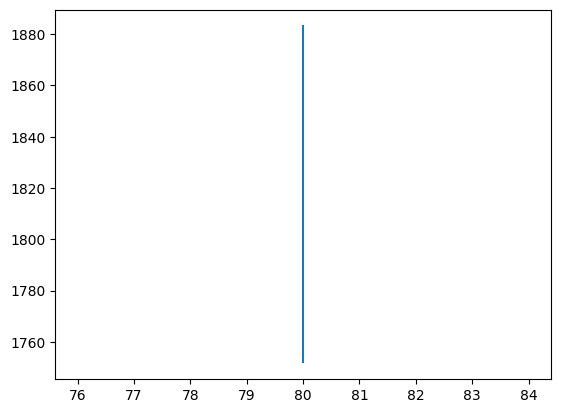

In [73]:
np.shape(trks)
trks[0, :12]

#print trcks when frame == 1
trks[trks[:, 1] == 2, :12]

#print trcks when ID == 1
trks[trks[:, 0] == 80, :12]

#plot x,y of track 80
import matplotlib.pyplot as plt
plt.plot(trks[trks[:, 0] == 80, 2], trks[trks[:, 0] == 80, 3])
